Alfred Wisana
C14210177

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
image = cv2.imread('lena.png')

In [22]:
height, width = image.shape[:2]

print("Image width:", width)
print("Image height:", height)

Image width: 512
Image height: 512


In [23]:
resized_image = cv2.resize(image, (200, 200))

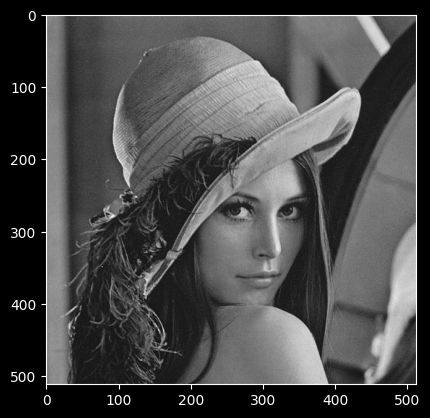

In [24]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

BLUR IMAGE

In [25]:
blur = cv2.blur(gray, (15,15))

Gaussian Blur

In [32]:
gauss_blur = cv2.GaussianBlur(gray,(13,13),0)

CUSTOM KERNEL

In [31]:
kernel = np.array([
    [0, 0.1, 0.2, 0.1, 0],
    [0.1, 0.3, 0.4, 0.3, 0.1],
    [0.2, 0.4, 5, 0.4, 0.2],
    [0.1, 0.3, 4, 0.3, 0.1],
    [0, 0.1, 0.2, 0.1, 0],
])

kernel /= kernel.sum()
custom_blur = cv2.filter2D(gray,-1,kernel=kernel)

Partial Blur

In [28]:
x, y, w, h = 150, 120, 200, 200

part_blur = gray.copy()

mask = np.zeros_like(part_blur)

kernel_size = (25,25)

cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)

blurred_region = cv2.GaussianBlur(part_blur[y:y+h, x:x+w], kernel_size, 0)

part_blur[y:y+h, x:x+w] = blurred_region

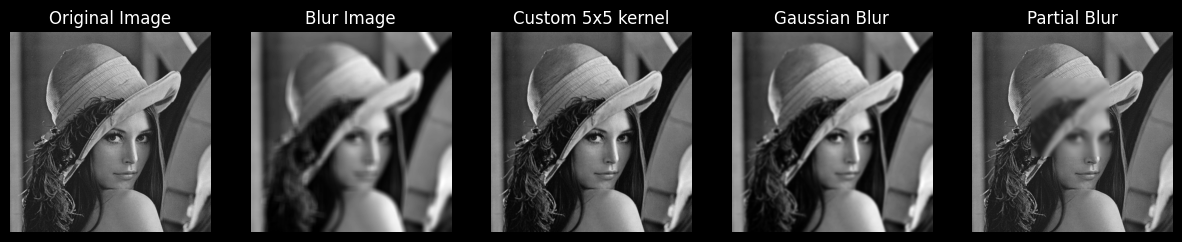

In [33]:
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 5, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot blurred image
plt.subplot(1, 5, 2)
plt.imshow(blur, cmap='gray')
plt.title('Blur Image')
plt.axis('off')

# Plot Custome blurred image
plt.subplot(1, 5, 3)
plt.imshow(custom_blur, cmap='gray')
plt.title('Custom 5x5 kernel')
plt.axis('off')

#Gaussian Blur
plt.subplot(1, 5, 4)
plt.imshow(gauss_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

#Partial Blur
plt.subplot(1, 5, 5)
plt.imshow(part_blur, cmap='gray')
plt.title('Partial Blur')
plt.axis('off')

plt.show()


Image Sharpening

Custom Kernel Sharpen

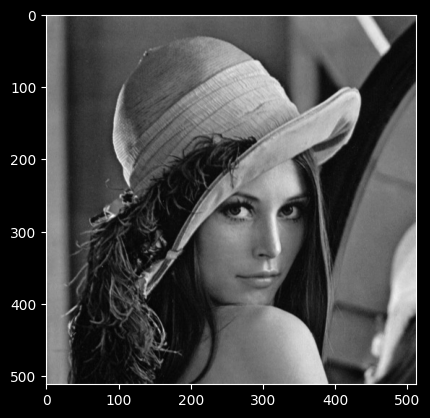

In [30]:
kernel = np.array([[-1, 1, 1, 1, 1],
                   [-1, 1, 1, 1, 1],
                   [-1, 1, 0, 0, -1],
                   [-1, 1, 0, 1, -1],
                   [-1, 1, 0, 0, 1]])
custom_sharp = cv2.filter2D(gray,-1,kernel=kernel)
plt.imshow(custom_blur,cmap='gray')

Edge Detection